<a href="https://colab.research.google.com/github/M-kaur07/Hardware_Trojan_Detection_GNN/blob/main/Research_DFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyverilog networkx graphviz
from pathlib import Path
from pyverilog.vparser.parser import VerilogParser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.4/136.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyverilog: filename=pyverilog-1.3.0-py3-none-any.whl size=118929 sha256=f237e120af3363832310b0ab5ffeba8070759d0745e39828b969107f36eb0961
  Stored in directory: /root/.cache/pip/wheels/e8/ba/6a/1068516e0581249663c83d9c7773bac1c20a8b35e6692dbf02
Successfully built pyverilog


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving RS232-T1100.zip to RS232-T1100.zip
Saving RS232-T1000.zip to RS232-T1000.zip
Saving AES-T2200 (2).zip to AES-T2200 (2).zip


In [ ]:
import zipfile
import os

for fname in uploaded.keys():
    if fname.endswith(".zip"):
        folder_name = fname.replace(".zip", "")
        with zipfile.ZipFile(fname, 'r') as zip_ref:
            zip_ref.extractall(folder_name)
        print(f".. Unzipped to: {folder_name}")



.. Unzipped to: RS232-T1100
.. Unzipped to: RS232-T1000
.. Unzipped to: AES-T2200 (2)


In [ ]:
def safe_parse_verilog(filepath):
    parser = VerilogParser()
    with open(filepath, 'r') as f:
        code = f.read()
    ast = parser.parse(code)
    return ast


In [ ]:
folder_to_search = 'AES-T2200 (2)' #'AES-T2200'  # or RS232-T1000 or RS232-T1100
verilog_files = list(Path(folder_to_search).rglob("*.v"))
print(f" Found {len(verilog_files)} Verilog files")

folder_to_search = 'RS232-T1000' #'AES-T2200'  # or RS232-T1000 or RS232-T1100
verilog_files = list(Path(folder_to_search).rglob("*.v"))
print(f" Found {len(verilog_files)} Verilog files")

folder_to_search = 'RS232-T1100' #'AES-T2200'  # or RS232-T1000 or RS232-T1100
verilog_files = list(Path(folder_to_search).rglob("*.v"))
print(f" Found {len(verilog_files)} Verilog files")



 Found 4 Verilog files
 Found 5 Verilog files
 Found 5 Verilog files


In [ ]:
import os

for name in os.listdir():
    if os.path.isdir(name):
        print("", name)


 .config
 RS232-T1000
 RS232-T1100
 AES-T2200 (2)
 sample_data


In [ ]:
from pathlib import Path

search_folders = ['RS232-T1100', 'RS232-T1000', 'AES-T2200 (2)', 'trusthub_netlists']
found_files = {}

for folder in search_folders:
    files = list(Path(folder).rglob("*.v"))
    if files:
        found_files[folder] = files

if not found_files:
    print(":( No Verilog (.v) files found in given folders.")
else:
    for folder, files in found_files.items():
        print(f" {folder} contains {len(files)} Verilog files:")
        for f in files:
            print(" ---", f)


 RS232-T1100 contains 5 Verilog files:
 --- RS232-T1100/RS232-T1100/pattern/PathDelay/TestPatterns_stildpv.v
 --- RS232-T1100/RS232-T1100/pattern/StuckAtFault/TestPatterns_stildpv.v
 --- RS232-T1100/RS232-T1100/pattern/TransitionDelay/TestPatterns_stildpv.v
 --- RS232-T1100/RS232-T1100/src/90nm/uart.v
 --- RS232-T1100/RS232-T1100/src/180nm/uart.v
 RS232-T1000 contains 5 Verilog files:
 --- RS232-T1000/RS232-T1000/pattern/PathDelay/TestPatterns_stildpv.v
 --- RS232-T1000/RS232-T1000/pattern/StuckAtFault/TestPatterns_stildpv.v
 --- RS232-T1000/RS232-T1000/pattern/TransitionDelay/TestPatterns_stildpv.v
 --- RS232-T1000/RS232-T1000/src/90nm/uart.v
 --- RS232-T1000/RS232-T1000/src/180nm/uart.v
 AES-T2200 (2) contains 4 Verilog files:
 --- AES-T2200 (2)/AES-T2200/src/TjIn/aes_synth_opt.v
 --- AES-T2200 (2)/AES-T2200/src/TjIn/tbTOP.v
 --- AES-T2200 (2)/AES-T2200/src/TjIn/aes_synth.v
 --- AES-T2200 (2)/AES-T2200/src/TjIn/test_aes_128.v


In [ ]:
from pyverilog.vparser.parser import parse
import os

example_file = "RS232-T1000/RS232-T1000/src/90nm/uart.v"

# if file exists
if not os.path.exists(example_file):
    raise FileNotFoundError(f":( File not found: {example_file}")

# Parsing
ast, directives = parse([example_file])
print("..... AST parsed successfully!")
ast.show()

Generating LALR tables


FileNotFoundError: [Errno 2] No such file or directory: 'iverilog'

In [ ]:
for name in os.listdir():
    if os.path.isdir(name):
        print("", name)


 .config
 RS232-T1000
 RS232-T1100
 AES-T2200 (2)
 sample_data


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from pyverilog.vparser.parser import parse
from pyverilog.vparser.ast import InstanceList, Instance, PortArg

# empty directed graph
dfg = nx.DiGraph()

# recursive function to extract module connections
def extract_modules(node):
    if isinstance(node, InstanceList):
        for instance in node.instances:
            if isinstance(instance, Instance):
                gate_name = instance.name
                module_type = node.module
                dfg.add_node(gate_name, type=module_type)

                # Handle connections (ports)
                for port in instance.portlist:
                    if isinstance(port, PortArg):
                        signal = str(port.argname)
                        portname = str(port.portname)

                        # Crude input/output check
                        if 'in' in portname.lower():
                            dfg.add_edge(signal, gate_name)
                        elif 'out' in portname.lower():
                            dfg.add_edge(gate_name, signal)

    # Recursively check children nodes
    for c in node.children():
        extract_modules(c)

# AST traversal and DFG construction
extract_modules(ast)
print("DFG constructed")
print(f"Nodes: {dfg.number_of_nodes()}, Edges: {dfg.number_of_edges()}")

# visualization (only for small graphs)
if dfg.number_of_nodes() < 100:
    plt.figure(figsize=(10, 8))
    nx.draw(dfg, with_labels=True, node_color='lightblue', arrows=True)
    plt.title("Data Flow Graph (DFG)")
    plt.show()
else:
    print("DFG too large to visualize")

#saved dfg using pickel
with open("dfg_uart.gpickle", "wb") as f:
    pickle.dump(dfg, f)
print("DFG saved as 'dfg_uart.gpickle'")


NameError: name 'ast' is not defined

In [ ]:
with open("dfg_uart.gpickle", "rb") as f:
    dfg = pickle.load(f)

print("DFG loaded with", dfg.number_of_nodes(), "nodes")


FileNotFoundError: [Errno 2] No such file or directory: 'dfg_uart.gpickle'

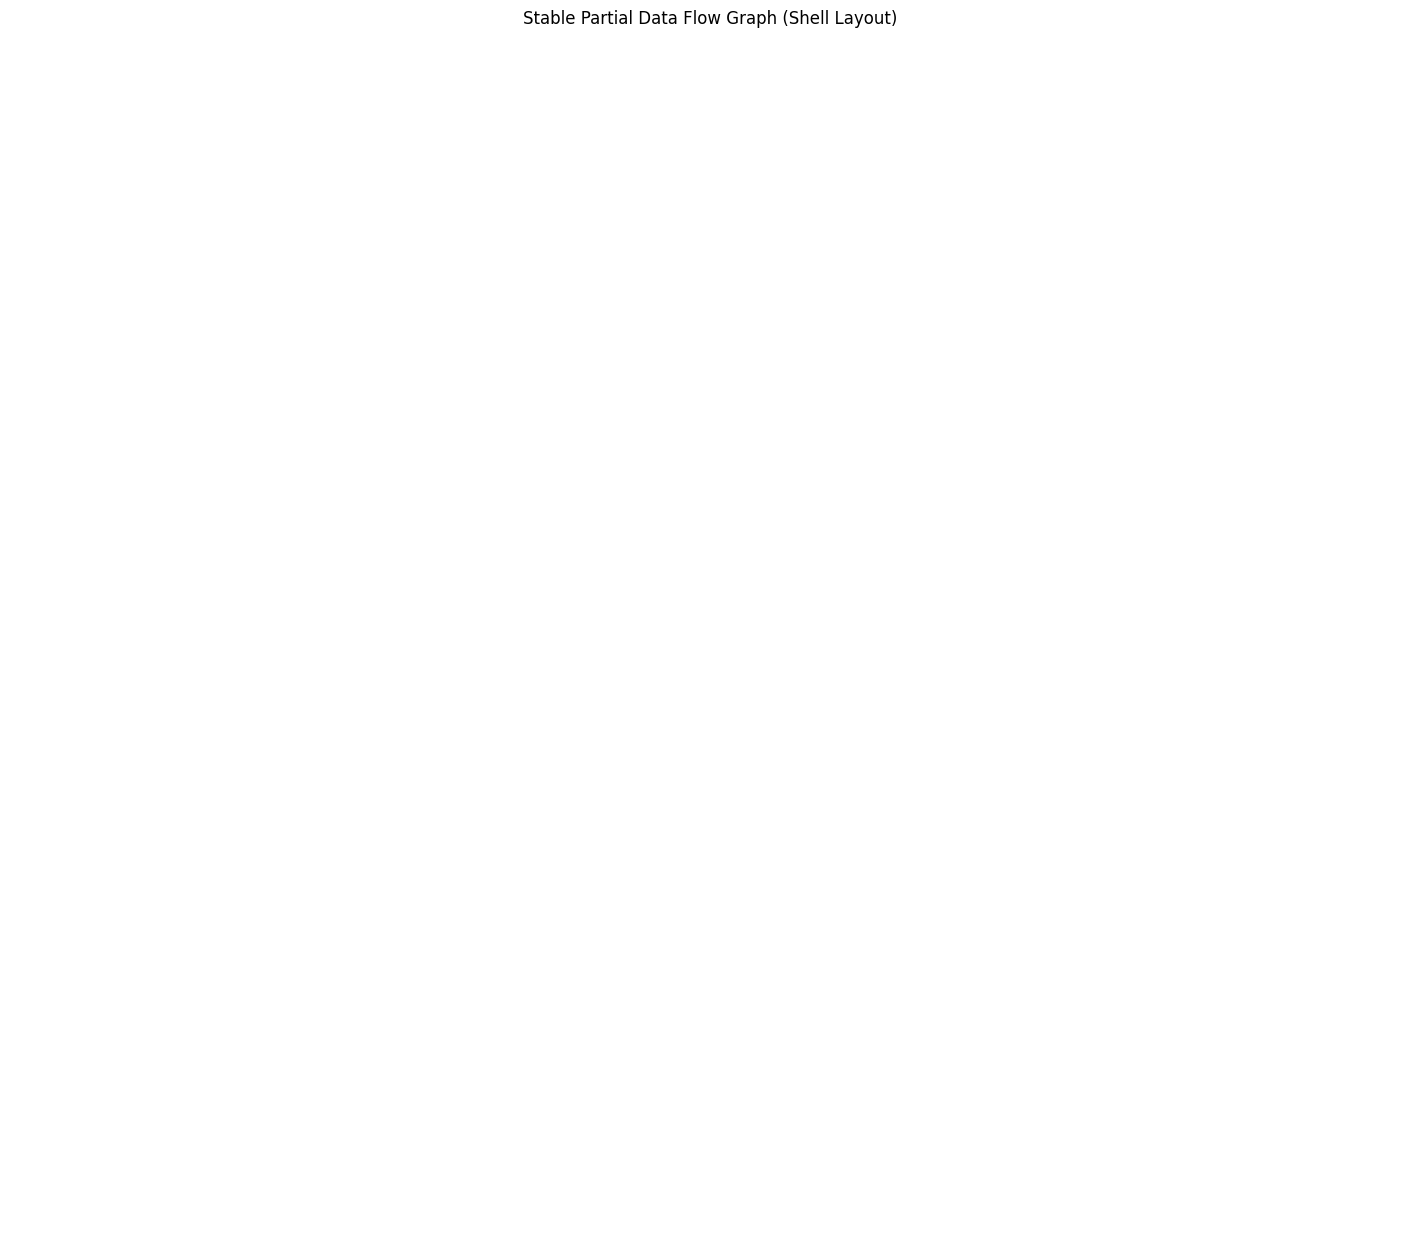

In [ ]:
# subset of 50 nodes to keep it readable
sub_nodes = list(dfg.nodes)[:50]
subgraph = dfg.subgraph(sub_nodes)

plt.figure(figsize=(14, 12))
pos = nx.shell_layout(subgraph)  # more stable than spring_layout

nx.draw(
    subgraph, pos,
    with_labels=True,
    node_color='skyblue',
    edge_color='gray',
    node_size=800,
    font_size=9,
    arrows=True
)

plt.title("Stable Partial Data Flow Graph (Shell Layout)")
plt.axis('off')
plt.show()


In [ ]:
!pip install pyvis

In [ ]:
from pyvis.network import Network

# Create pyvis network (interactive HTML)
net = Network(height="700px", width="100%", directed=True, notebook=True, cdn_resources='remote')


# Extract and visualize a subgraph of the DFG (first 50 nodes)
sub_nodes = list(dfg.nodes)[:50]
subgraph = dfg.subgraph(sub_nodes)

# Added nodes and edges
for node in subgraph.nodes:
    net.add_node(node, label=node, title=f"Type: {dfg.nodes[node].get('type', '')}")

for src, dst in subgraph.edges:
    net.add_edge(src, dst)

#net.show("dfg_subgraph.html")


In [ ]:
from google.colab import files
files.download("dfg_subgraph.html")


In [ ]:
with open("dfg_uart.gpickle", "rb") as f:
    full_dfg = pickle.load(f)

# Initialize pyvis network for full DFG
net = Network(height="900px", width="100%", directed=True, notebook=True, cdn_resources='in_line')

for node in full_dfg.nodes:
    net.add_node(node, label=node, title=f"Type: {full_dfg.nodes[node].get('type', '')}")

for src, dst in full_dfg.edges:
    net.add_edge(src, dst)


In [ ]:
net.show("dfg_full.html")

from google.colab import files
files.download("dfg_full.html")

In [ ]:

#for Trojaned RS232-T1100 benchmark
verilog_file = "RS232-T1100/RS232-T1100/src/90nm/uart.v"

#Parse Verilog File
ast, _ = parse([verilog_file])
print("Parsed successfully")

#Directed Data Flow Graph (DFG)
dfg = nx.DiGraph()

def extract_modules(node):
    if isinstance(node, InstanceList):
        for instance in node.instances:
            if isinstance(instance, Instance):
                gate_name = instance.name
                module_type = node.module
                dfg.add_node(gate_name, type=module_type)
                for port in instance.portlist:
                    if isinstance(port, PortArg):
                        signal = str(port.argname)
                        portname = str(port.portname)
                        if 'in' in portname.lower():
                            dfg.add_edge(signal, gate_name)
                        elif 'out' in portname.lower():
                            dfg.add_edge(gate_name, signal)
    for c in node.children():
        extract_modules(c)

extract_modules(ast)

print("DFG constructed")
print(f"Nodes: {dfg.number_of_nodes()}, Edges: {dfg.number_of_edges()}")

with open("dfg_uart_trojaned.gpickle", "wb") as f:
    pickle.dump(dfg, f)
print("DFG saved as 'dfg_uart_trojaned.gpickle'")

sub_nodes = list(dfg.nodes)[:50]
subgraph = dfg.subgraph(sub_nodes)

net = Network(height="700px", width="100%", directed=True, notebook=True)
net.barnes_hut()

for node in subgraph.nodes:
    net.add_node(node, label=node)
for u, v in subgraph.edges:
    net.add_edge(u, v)


In [ ]:
net.show("dfg_uart_trojaned_full.html")  # Save HTML file
print("HTML saved as dfg_uart_trojaned_full.html")


In [ ]:
from google.colab import files
files.download("dfg_uart_trojaned_full.html")
